In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

In [2]:
# here wea are setting the style and size of the figures that we will be producing. I reccomend that you use these setting as well but
# you are free to experiment with them. The complete list of plot styles(plt.style) can be found by the link below. 
# (https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
sns.set(rc={'figure.figsize':(15,10)})
plt.style.use('_classic_test_patch')

In [3]:
df = pd.read_csv("/Users/natemcdowell/Desktop/python_for_the_datajam/datasets/merged_data.csv")

In [4]:
df.head()

,date,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths
0,2000-01-31,0.665408,0.353813,0.631568,0.0,0.0,0.923307,0.0,0.0
1,2000-02-29,0.584110,0.412626,0.590162,0.0,0.0,0.832206,0.0,0.0
2,2000-03-31,0.578318,0.500226,0.609973,0.0,0.0,0.896287,0.0,0.0
3,2000-04-30,0.552910,0.445279,0.627176,0.0,0.0,0.882311,0.0,0.0
4,2000-05-31,0.563840,0.534864,0.646570,0.0,0.0,0.930976,0.0,0.0


<AxesSubplot:>

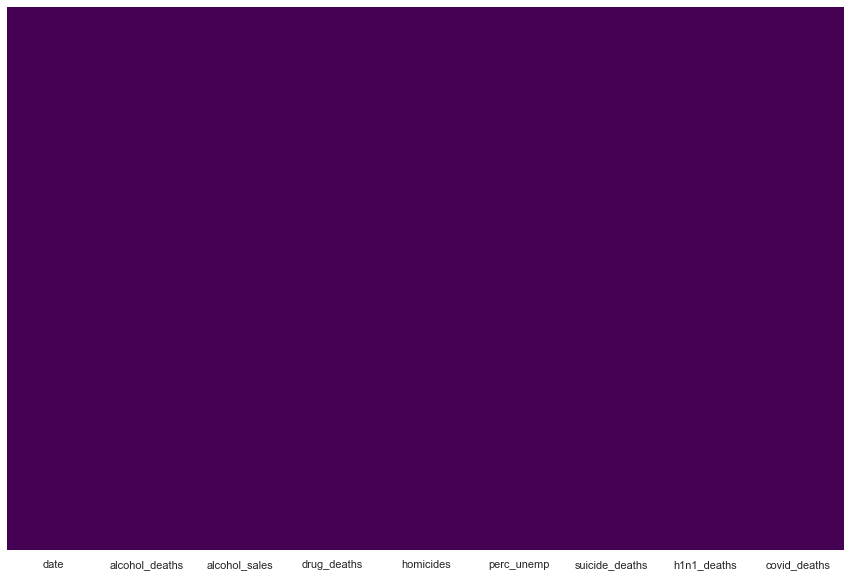

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df = df.set_index('date')

In [7]:
df.dtypes

alcohol_deaths    float64
alcohol_sales     float64
drug_deaths       float64
homicides         float64
perc_unemp        float64
suicide_deaths    float64
h1n1_deaths       float64
covid_deaths      float64
dtype: object

In [8]:
def multiline(dataframe):
    for col in dataframe.columns:
        ax = plt.plot(dataframe.index, dataframe[col], label=col)
        listOf_Xticks = np.arange(0, len(dataframe), 24 )
        plt.xticks(listOf_Xticks)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

The function above is going to help me plot my data for the rest of the notebook. Although Python has powerful plotting abilities, it is sometimes difficult to get the graph exactly as you want. The function below is capable of producing a proper and informative graph. This function is written to plot the data from each column of your dataframe. It accepts one parameter which is the dataframe you want to plot; however, you can specify the clolumns you want to plot by adding them to the dataframe with double brackets. 

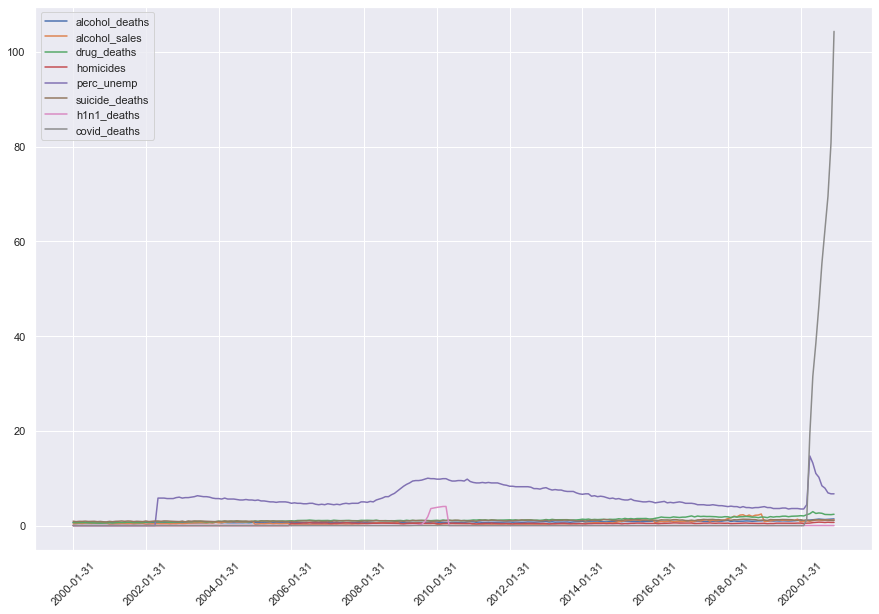

In [9]:
multiline(df)

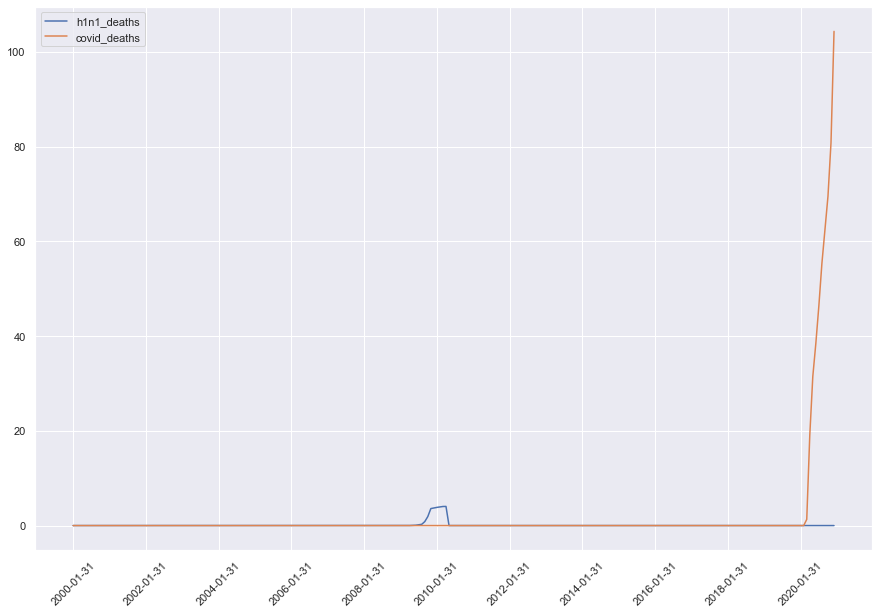

In [10]:
# If you only want to include a specific set of columns you can simply join them to the dataframe parameter in two sets of brackets. 
# This technique is shown below. 

multiline(df[['h1n1_deaths','covid_deaths']])

This graph shows the differnence between h1n1 deaths and covid deaths more clearly. The differnce in scales is very obvious now. 

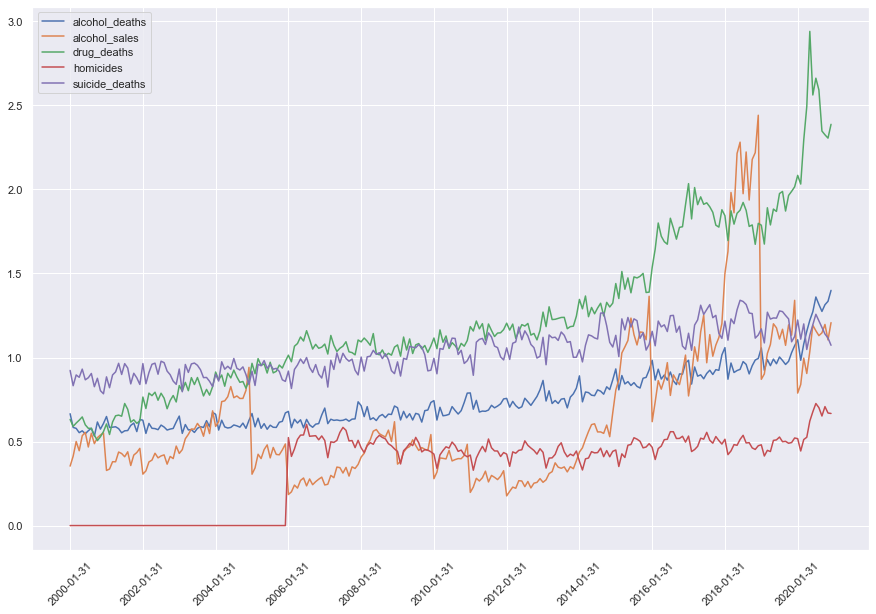

In [11]:
multiline(df[['alcohol_deaths','alcohol_sales','drug_deaths','homicides','suicide_deaths',]])

This figure shows the different health factors in the dataframe. 

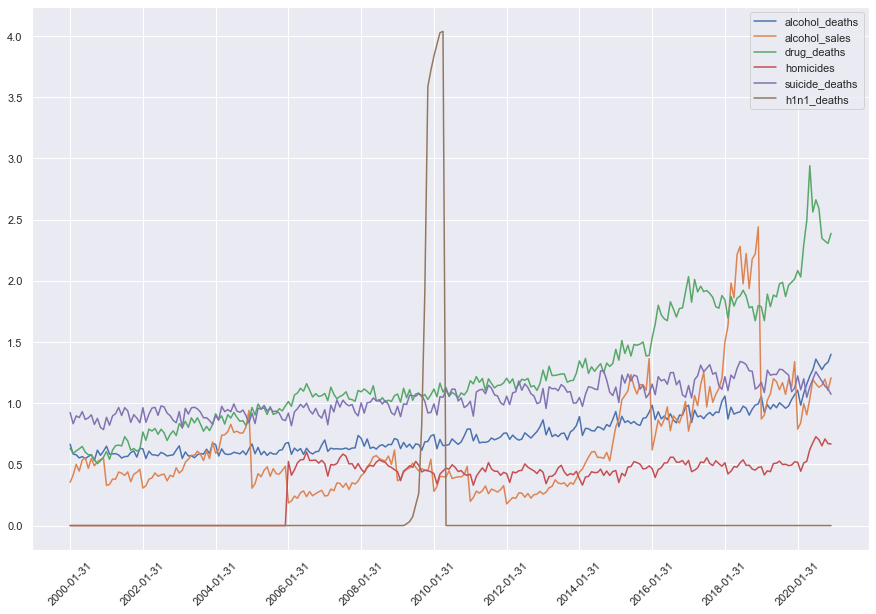

In [12]:
multiline(df[['alcohol_deaths','alcohol_sales','drug_deaths','homicides','suicide_deaths','h1n1_deaths']])

This dataframe shows how the health factors relate to deaths from the h1n1 pandemic. 

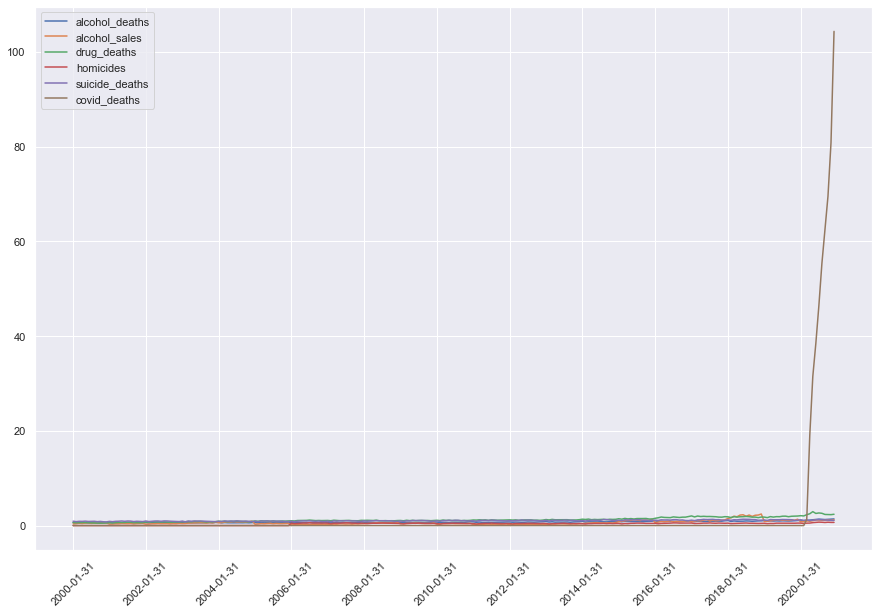

In [13]:
multiline(df[['alcohol_deaths','alcohol_sales','drug_deaths','homicides','suicide_deaths','covid_deaths']])

This figure shows how truly devastating the COVID-19 pandmeic was for the US. All other health factors were seriously dwarfed by the amount of COVID deaths

In [14]:
df.to_csv("/Users/natemcdowell/Desktop/python_for_the_datajam/datasets/for_ml.csv",index = True)